## Regresión Logistica

Es un algoritmo para resolver problemas de clasificación binaria, donde solo hay dos posibles resultados posibles. Si hay más categorías es una regresión Logística multinominal.

Algunos problemas en que se podría aplicar serían:

- Detección de Spam (es spam, no es spam)
- Detección de una enfermedad (es enfermedad, no es enfermedad).
- Prestamos (es solvente, no es solvente)


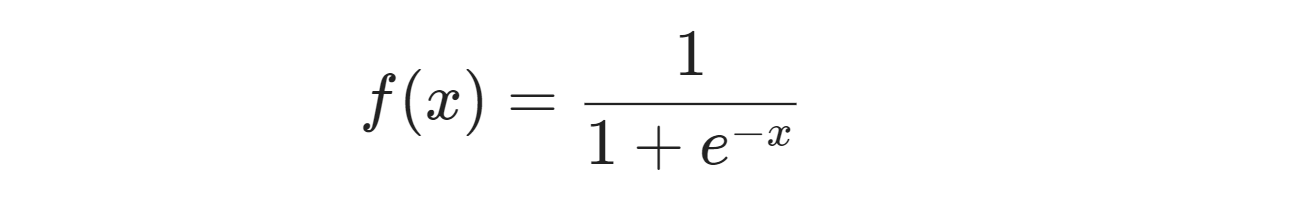

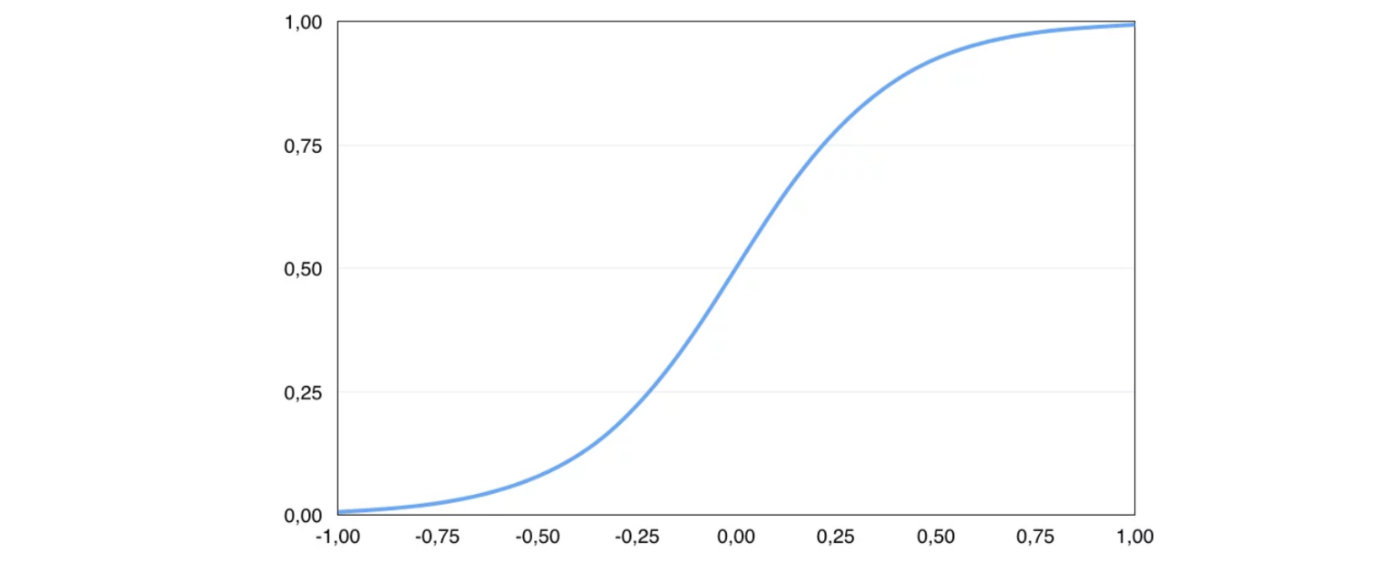

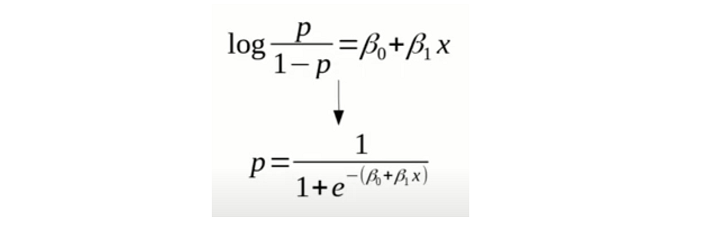

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= cancer['feature_names'] + ['target'])


UFuncTypeError: ignored

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df.value_counts('target')

target
1.0    357
0.0    212
dtype: int64

In [ ]:
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
features = df.drop(columns='target')
target = df['target']

In [ ]:
features.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [ ]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.3)
# Creando objeto modelo
model = LogisticRegression()

# Entrenando modelo
model.fit(x_train, y_train)


# Realizando predicciones
y_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#  Los odds se interpretan como ratios,
# es decir, la cantidad de veces que algo
# pueda suceder sobre que no pueda suceder.

# el aumento de una unidad de worst radius,
#  y si el resto de variables se
# mantuvieran constantes, aumentaría los odds
# de tener cáncer en 2.706 veces más
# que si no se aumentara esa unidad del worst radius.

df_coef = pd.DataFrame(model.coef_[0], x_test.columns,columns=['coeficientes'])
df_coef['odd_ratios'] = np.exp(df_coef['coeficientes'])
df_coef.loc[df_coef['odd_ratios'] < 1, 'impacto'] = 1 / df_coef['odd_ratios']
df_coef.loc[df_coef['odd_ratios'] >= 1, 'impacto'] = df_coef['odd_ratios']
df_coef.sort_values('impacto', ascending=False).head(10)

,coeficientes,odd_ratios,impacto
worst radius,0.995493,2.706058,2.706058
mean radius,0.890816,2.437118,2.437118
worst concavity,-0.604275,0.546470,1.829926
worst texture,-0.512711,0.598870,1.669811
mean texture,0.494690,1.639989,1.639989
worst compactness,-0.490919,0.612064,1.633817
texture error,0.319704,1.376720,1.376720
perimeter error,0.289832,1.336203,1.336203
mean concavity,-0.219001,0.803321,1.244833
worst concave points,-0.177286,0.837540,1.193973


# Evaluando el modelo usando matriz de confusión

In [ ]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[ 51,   7],
       [  4, 109]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Etiqueta predicha (predicted label)')

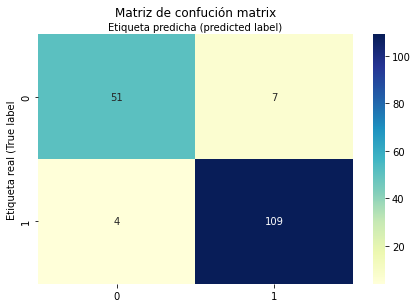

In [ ]:
class_names=[0, 1] # categorías
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confución matrix', y=1.1)
plt.ylabel('Etiqueta real (True label')
plt.xlabel('Etiqueta predicha (predicted label)')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.935672514619883
Precision: 0.9396551724137931
Recall: 0.9646017699115044


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# Entrenando modelo
model.fit(x_train, y_train)

# Realizando predicciones
y_pred = model.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9298245614035088
Precision: 0.954954954954955
Recall: 0.9380530973451328
